## Optimisation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Final loop nonsense

In [6]:
P = np.array([[[0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.45 , 0.1  , 0.2  , 0.1  , 0.15 ],
        [0.21 , 0.37 , 0.19 , 0.17 , 0.06 ],
        [0.2  , 0.2  , 0.1  , 0.35 , 0.15 ]],

       [[0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.185, 0.13 , 0.205, 0.285, 0.195],
        [0.365, 0.11 , 0.18 , 0.175, 0.17 ],
        [0.222, 0.312, 0.162, 0.167, 0.137],
        [0.215, 0.175, 0.16 , 0.295, 0.155]],

       [[0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.18 , 0.23 , 0.145, 0.3  , 0.145],
        [0.24 , 0.35 , 0.11 , 0.145, 0.155],
        [0.131, 0.271, 0.321, 0.156, 0.121],
        [0.295, 0.225, 0.13 , 0.16 , 0.19 ]],

       [[0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.13 , 0.205, 0.285, 0.195, 0.185],
        [0.11 , 0.18 , 0.175, 0.17 , 0.365],
        [0.162, 0.312, 0.222, 0.137, 0.167],
        [0.295, 0.155, 0.215, 0.175, 0.16 ]]])
err_neighbourhood = {2: np.array([[0, 1],
       [1, 1],
       [2, 2],
       [3, 2]]), 3: np.array([[0, 1],
       [1, 1],
       [2, 2],
       [3, 3]]), 4: np.array([[0, 2],
       [1, 2],
       [2, 3],
       [3, 4]]), 1: np.array([[1, 1],
       [2, 1],
       [3, 2]])}
prior = np.array([[0.2, 0.3, 0.1, 0.25, 0.15],
                  [0.25, 0.2, 0.3, 0.15, 0.1],
                  [0.15, 0.25, 0.2, 0.3, 0.1],
                  [0.1, 0.15, 0.25, 0.2, 0.3],
                  [0.3, 0.1, 0.15, 0.25, 0.2]])

In [8]:
err_neighbourhood[2][:, 0]

array([0, 1, 2, 3])

In [191]:
ch_posteriors = np.zeros((5, 5))

for i, dets in err_neighbourhood.items():
    # TODO: Vectorize this:
    print(np.prod(P[dets[:, 0], i, :], axis=0))
    print(prior[i, :])
    print('--------------------')
    posterior = np.prod(P[dets[:, 0], i, :], axis=0) * prior[i, :]
    ch_posteriors[i, :] = posterior

[0.0043362  0.000693   0.000693   0.00043137 0.00144266]
[0.15 0.25 0.2  0.3  0.1 ]
--------------------
[0.00098937 0.00976068 0.00219344 0.00060675 0.0001661 ]
[0.1  0.15 0.25 0.2  0.3 ]
--------------------
[0.00374207 0.00122062 0.0004472  0.002891   0.0007068 ]
[0.3  0.1  0.15 0.25 0.2 ]
--------------------
[0.004329   0.0061295  0.00847162 0.0166725  0.00523087]
[0.25 0.2  0.3  0.15 0.1 ]
--------------------


In [208]:
ch_posteriors == posteriors

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [180]:
keys = list(err_neighbourhood.keys())

In [206]:
np.array([np.prod(P[err_neighbourhood[i][:, 0], i, :], axis=0) for i in keys]) * prior[keys, :]

array([[6.50430000e-04, 1.73250000e-04, 1.38600000e-04, 1.29412500e-04,
        1.44266250e-04],
       [9.89369640e-05, 1.46410243e-03, 5.48361090e-04, 1.21350216e-04,
        4.98304620e-05],
       [1.12262250e-03, 1.22062500e-04, 6.70800000e-05, 7.22750000e-04,
        1.41360000e-04],
       [1.08225000e-03, 1.22590000e-03, 2.54148750e-03, 2.50087500e-03,
        5.23087500e-04]])

In [207]:
posteriors = np.zeros((5, 5))
posteriors[keys, :] = np.array([np.prod(P[err_neighbourhood[i][:, 0], i, :], axis=0) for i in keys]) * prior[keys, :]

In [202]:
i=2
P[err_neighbourhood[i][:, 0], i, :]

array([[0.45 , 0.1  , 0.2  , 0.1  , 0.15 ],
       [0.365, 0.11 , 0.18 , 0.175, 0.17 ],
       [0.24 , 0.35 , 0.11 , 0.145, 0.155],
       [0.11 , 0.18 , 0.175, 0.17 , 0.365]])

In [198]:
np.prod(np.array([P[err_neighbourhood[i][:, 0], i, :] for i in keys]), axis=1)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [190]:
np.prod(np.array([P[dets[:, 0], i, :] for i in keys]), axis=1) * prior[keys, :]

array([[0.0014454 , 0.0017325 , 0.000693  , 0.00129412, 0.00096178],
       [0.00047113, 0.00395703, 0.00288611, 0.00071382, 0.00083051],
       [0.00561311, 0.00061031, 0.0006708 , 0.002065  , 0.0009424 ],
       [0.00108225, 0.0012259 , 0.00254149, 0.00250088, 0.00052309]])

In [183]:
posteriors = np.zeros((5, 5))
posteriors[keys, :] = np.prod(np.array([P[dets[:, 0], i, :] for i in keys]), axis=1) * prior[keys]

In [189]:
posteriors

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.00108225, 0.0012259 , 0.00254149, 0.00250088, 0.00052309],
       [0.0014454 , 0.0017325 , 0.000693  , 0.00129412, 0.00096178],
       [0.00047113, 0.00395703, 0.00288611, 0.00071382, 0.00083051],
       [0.00561311, 0.00061031, 0.0006708 , 0.002065  , 0.0009424 ]])

In [137]:
posteriors

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.08225000e-03, 1.22590000e-03, 2.54148750e-03, 2.50087500e-03,
        5.23087500e-04],
       [6.50430000e-04, 1.73250000e-04, 1.38600000e-04, 1.29412500e-04,
        1.44266250e-04],
       [9.89369640e-05, 1.46410243e-03, 5.48361090e-04, 1.21350216e-04,
        4.98304620e-05],
       [1.12262250e-03, 1.22062500e-04, 6.70800000e-05, 7.22750000e-04,
        1.41360000e-04]])

In [ ]:
x = np.array([[[1, 2], 
              [2, 3]],
              [[3, 4], 
              [4, 5]]])
a = np.array([[0, 3],
              [1, 2]])

In [118]:
x[0]

array([[1, 2],
       [2, 3]])

In [121]:
np.prod(x, axis=1)

array([[ 2,  6],
       [12, 20]])

In [115]:
y = np.zeros((x.shape[1], x.shape[2]), dtype=int)

for i in range(x.shape[0]):
    z = np.prod(x[i], axis=0) * a[i, :]
    y[i] = z

In [116]:
y

array([[ 0, 18],
       [12, 40]])

In [126]:
xx = np.prod(x, axis=1)
xx

array([[ 2,  6],
       [12, 20]])

In [127]:
a

array([[0, 3],
       [1, 2]])

In [128]:
xx * a

array([[ 0, 18],
       [12, 40]])

In [125]:
np.einsum('ij, ik', xx, a)

array([[12, 30],
       [20, 58]])

## rfft nonsense

In [86]:
x = np.array([[0.1, 0.2, 0.5, 0.1, 0.1], [0.1, 0.2, 0.5, 0.1, 0.1], [0.3, 0.2, 0.1, 0.3, 0.1], [0.1, 0.2, 0.5, 0.1, 0.1]])

In [94]:
x = np.arange(100*500).reshape(100, 500)

In [50]:
x = [0.1, 0.2, 0.5, 0.1, 0.1]

In [95]:
t = datetime.now()
for i in range(10):
    _ = np.fft.fft(x, axis=1)
print(f"Time taken for FFT: {datetime.now() - t}")

Time taken for FFT: 0:00:00.008942


In [96]:
t = datetime.now()
for i in range(10):
    _ = np.fft.rfft(x)
print(f"Time taken for FFT: {datetime.now() - t}")

Time taken for FFT: 0:00:00.004680


In [85]:
np.fft.irfft(np.fft.rfft(x), len(np.fft.rfft(x)))

array([0.41961198, 0.68432424, 0.01864312, 0.87742067])

In [83]:
x = [0, 1, 0, 0, 0, 1, 0]

In [58]:
y

array([ 1.       +0.j        , -0.2927051-0.33021975j,
        0.0427051+0.32164408j])

In [64]:
y2 = [1.       +0.j        , -0.2927051-0.33021975j,
        0.0427051+0.32164408j, -0.2927051+0.33021975j, 0.0427051-0.32164408j]

In [65]:
np.fft.irfft(y2)

array([-0.00533814,  0.03925084,  0.28477174,  0.20007288,  0.28736696,
        0.03925084, -0.04544801,  0.20007288])

## Benchmarking

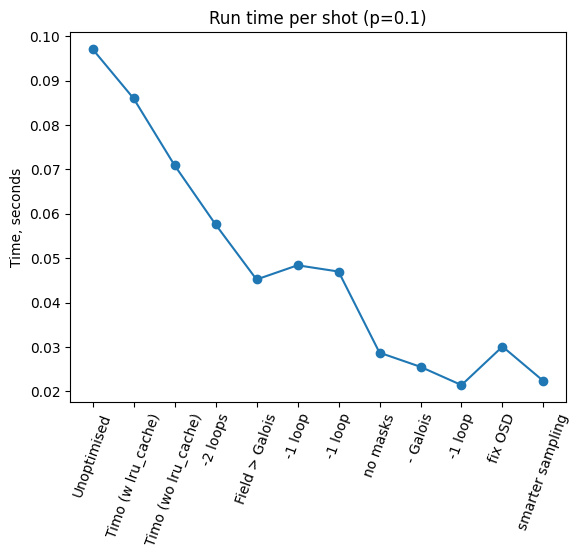

In [327]:
time = [0.097124, 0.086013, 0.070947, 0.057622, 0.045219, 0.048417, 0.047008, 0.028732, 0.025541, 0.021428, 0.030110, 0.022331]

plt.plot(time, marker='o')
plt.title('Run time per shot (p=0.1)')
# plt.xlabel('Optimising steps...')
plt.ylabel('Time, seconds')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['Unoptimised', 'Timo (w lru_cache)', 'Timo (wo lru_cache)', '-2 loops', 'Field > Galois', '-1 loop', '-1 loop', 'no masks', '- Galois', '-1 loop', 'fix OSD', 'smarter sampling'])
plt.xticks(rotation=70);